1.Importing necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


2. Loading and preprocessing the dataset

a)Load the dataset

In [2]:
df = pd.read_csv("adult.csv")
print(df)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

b)The columns with missing values are dropped and the duplicate values are also dropped

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

c)Encoding the categorical variables

In [4]:
cat_columns = df.select_dtypes(include=['object']).columns
labelencoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    labelencoders[col] = le


d)Defining the features and target 

In [5]:
X = df.drop('income', axis=1)
y = df['income']

e)Split the dataset into training and testdata

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Model Implementation-In the upcoming steps, two algorithms of bayesian is implemented, they are GaussianNB and BernoulliNB

In [8]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB



a) Initializing the classifiers

In [9]:
gaussian = GaussianNB()
bernoulli = BernoulliNB()

b)Training the models

In [10]:
gaussian.fit(X_train, y_train)
bernoulli.fit(X_train, y_train)

BernoulliNB()

c) Making the predictions

In [11]:
y_pred_gaussian = gaussian.predict(X_test)
y_pred_bernoulli = bernoulli.predict(X_test)

3. Hyperparameter Tuning- For the bernoulliNB, the 'alpha' parameter is tuned

In [12]:
from sklearn.model_selection import GridSearchCV


a)Defining the parameter grid

In [16]:
params = { 'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] }


b)Initializing the GridSearchCV

In [19]:
search_grid = GridSearchCV(BernoulliNB(), param_grid=params, cv=10, scoring='accuracy')

c)Fit the model

In [20]:
search_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]},
             scoring='accuracy')

d)Identifying the best parameters and estimators

In [21]:
best_params = search_grid.best_params_
best_bnb = search_grid.best_estimator_

e)Making predictions with the best model

In [22]:
Y_pred_best_bnb = best_bnb.predict(X_test)

4.Comparison and Evaluation- comparing the models

a) Deriving the accuracy scores

In [23]:
accuracy_of_gnb = accuracy_score(y_test, y_pred_gaussian)
accuracy_of_bnb = accuracy_score(y_test, y_pred_bernoulli)
accuracy_of_best_bnb = accuracy_score(y_test, Y_pred_best_bnb)

Printing the results

In [24]:
print("Accuracy of GaussianNB:", accuracy_of_gnb)
print("Accuracy of BernoulliNB:", accuracy_of_bnb)
print("Accuracy of Best BernoulliNB:", accuracy_of_best_bnb)

Accuracy of GaussianNB: 0.7971727105101414
Accuracy of BernoulliNB: 0.7251075599262446
Accuracy of Best BernoulliNB: 0.7251075599262446


b) Deriving the classification reports

In [25]:
print("Confusion Matrix of GaussianNB:")
print(confusion_matrix(y_test, y_pred_gaussian))
print("Confusion Matrix of BernoulliNB:")
print(confusion_matrix(y_test, y_pred_bernoulli))
print("Confusion Matrix of Best BernoulliNB:")
print(confusion_matrix(y_test, Y_pred_best_bnb))

Confusion Matrix of GaussianNB:
[[4729  259]
 [1061  459]]
Confusion Matrix of BernoulliNB:
[[3596 1392]
 [ 397 1123]]
Confusion Matrix of Best BernoulliNB:
[[3596 1392]
 [ 397 1123]]


c) Confusion matrices

In [26]:
config_matrix_gnb = confusion_matrix(y_test, y_pred_gaussian)
config_matrix_bnb = confusion_matrix(y_test, y_pred_bernoulli)
config_matrix_best_bnb = confusion_matrix(y_test, Y_pred_best_bnb)

d)Plotting the confusion matrices

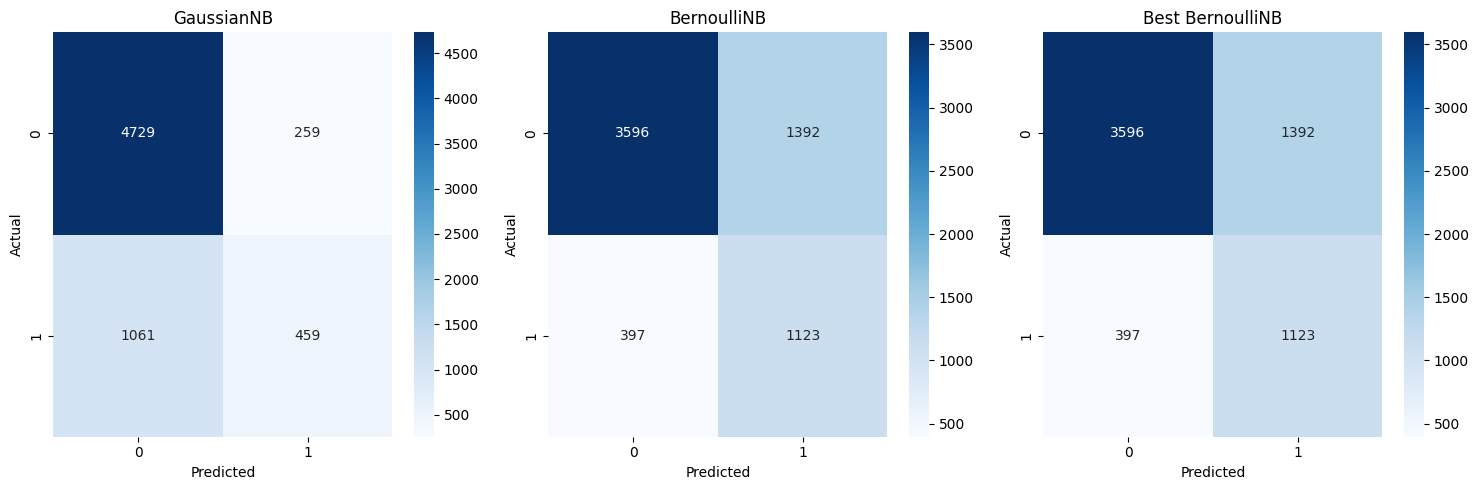

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, cm, title in zip(axes, [config_matrix_gnb, config_matrix_bnb, config_matrix_best_bnb], ['GaussianNB', 'BernoulliNB', 'Best BernoulliNB']):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)
plt.tight_layout()
plt.show()